In [266]:
import numpy
import numpy.matlib
import matplotlib.pyplot
%matplotlib inline
import random
import matplotlib.cm as cm

In [267]:
Xbad = numpy.matrix(numpy.loadtxt("q1/Xbad.csv", delimiter=","))
# now X is the data matrix and each row of X corresponds to one data point

In [268]:
Mu = numpy.matrix(numpy.loadtxt("q1/Mu.csv", delimiter=","))
# Mu is the mean vector of all the smilie faces (in vector format)

In [269]:
Sigma = numpy.matrix(numpy.cov(Xbad))
# Numpy does the covariance calculation for you using function cov

In [270]:
W = numpy.matrix(numpy.loadtxt("q1/W.csv", delimiter=","))

In [271]:
Y1 = numpy.matrix(numpy.loadtxt("q1/Y1.csv", delimiter=","))

In [272]:
W.shape

(11025, 20)

In [273]:
Y = (Xbad-numpy.average(Xbad,0))*W
# Here is the line that does the linear projection to lower dimension
# We are doing all the 28 ones in a batch and repmat repeats the single
# mean vector 28 times

#HELP

In [274]:
Xbad.shape

(28, 11025)

In [275]:
Y.shape

(28, 20)

In [276]:
for i in range(0,28):
    for j in range(0,20):
        if (Y1[0,j] < 0 and Y[i,j] >0) or (Y1[0,j] > 0 and Y[i,j] <0):
            Y[i,j] *= -1

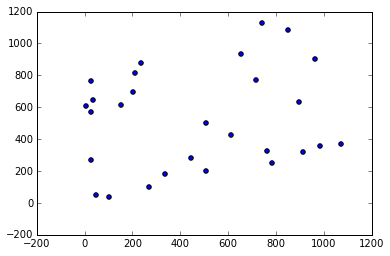

In [277]:
# First column of Y is the data on first principal component, second column
# is the second principal component and so on

#The below snippet that shows the 2 dimensional scatter plot of the images
matplotlib.pyplot.scatter(Y[:,0], Y[:,1])
#hold on
#for t = 1:28
#image([Y(t,1),Y(t,1)+400], [Y(t,2),Y(t,2)-400],I(:,:,t));
#end
# notice that the wink images are seperated from the other ones

In [278]:
#Image reconstruction
#Lets see how the reconstrcuted image looks like

Xhat = Y*numpy.transpose(W) + Mu

In [279]:
Ximage = numpy.empty((105,105,28))

In [280]:
Ximage2 = numpy.empty((105,105,28))

In [281]:
# Xhat is the vectorized version, let us put vectors back into images

for t in range(0,28):
    for n in range(0,105):
        for m in range(0, 105):
            #Ihat(n,m,t) = Xhat(t,(m-1)*105+ n)
            Ximage[n,m,t] = Xhat[t,(m-1)*105+ n]
            Ximage2[n,m,t] = Xbad[t,(m-1)*105+ n]

            
            


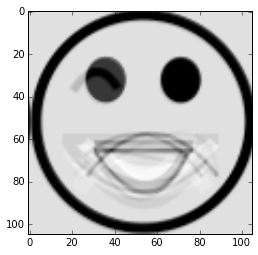

In [298]:
R = random.randint(1, 28)
matplotlib.pyplot.imshow(Ximage[:,:,R],cmap=cm.Greys_r)
# Play around with K to see the difference